# Build a multiple linear regression model for the prediction of demand for shared bikes

# Steps
## 1. Importing the necessary libraries
## 2. Data Preparation
## 3. EDA
## 4. Data Splitting and Feature Scaling
## 5. Feature Selection and Model Building
## 6. Residual Analysis
## 7. Final Model Evaluation

## 1. Importing the necessary libraries 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")

In [24]:
# Load the dataset
df = pd.read_csv('https://github.com/phanirajcm/LRAssignment/blob/aimliiitb/day.csv?raw=true')

In [25]:
# Display the first few rows of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 2. Data Preparation

### Convert Categorical Variables:



In [26]:
# Map categorical variables according to the data dictionary
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
weathersit_mapping = {1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'}
mnth_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

df['season'] = df['season'].map(season_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)
df['mnth'] = df['mnth'].map(mnth_mapping)
df['weekday'] = df['weekday'].map(weekday_mapping)

# Drop the columns 'instant', 'dteday', 'casual', and 'registered'
df = df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['season', 'weathersit', 'mnth', 'weekday'], drop_first=True)

# Display the first few rows of the dataset
df.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,True,False,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,True,False,False,False,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,False,True


## 3. Exploratory Data Analysis (EDA)


### Univariate Analysis:

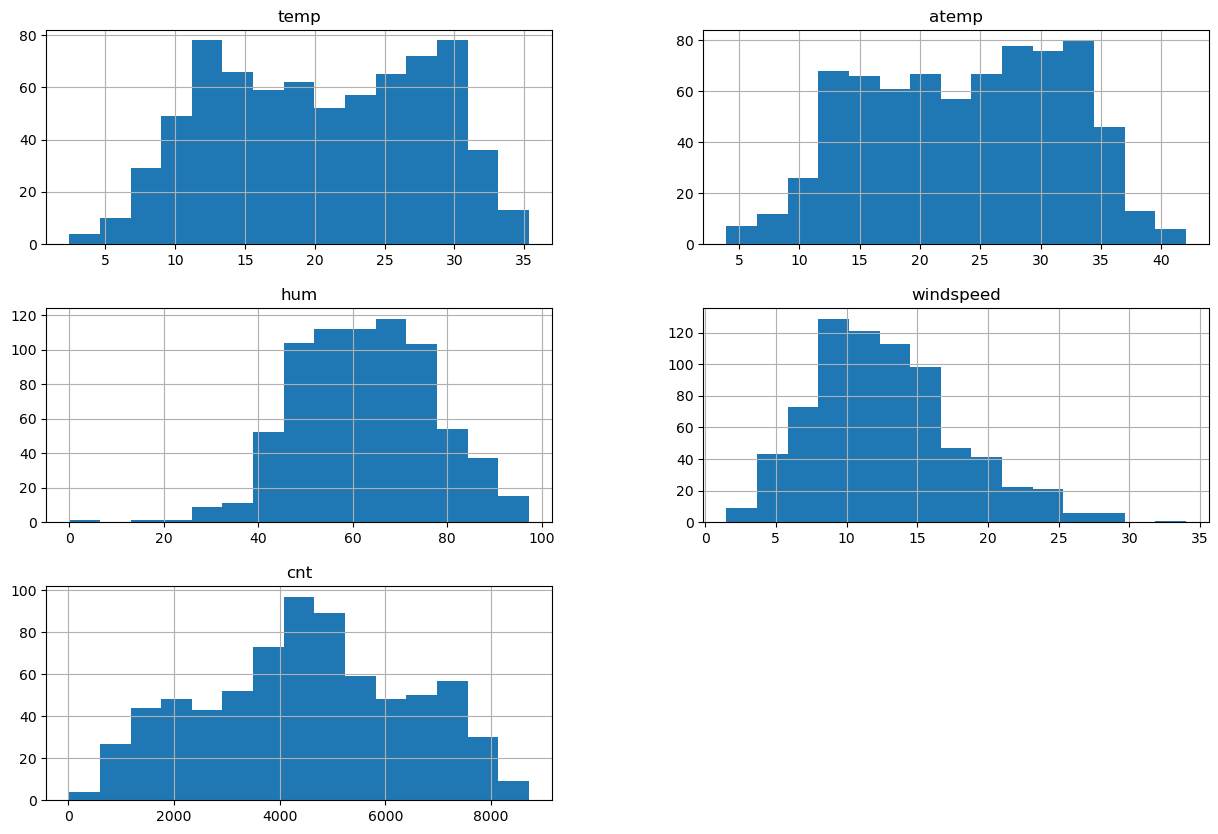

In [27]:
# Plot histograms for continuous variables
df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].hist(bins=15, figsize=(15, 10))
plt.show()


### Bivariate Analysis:


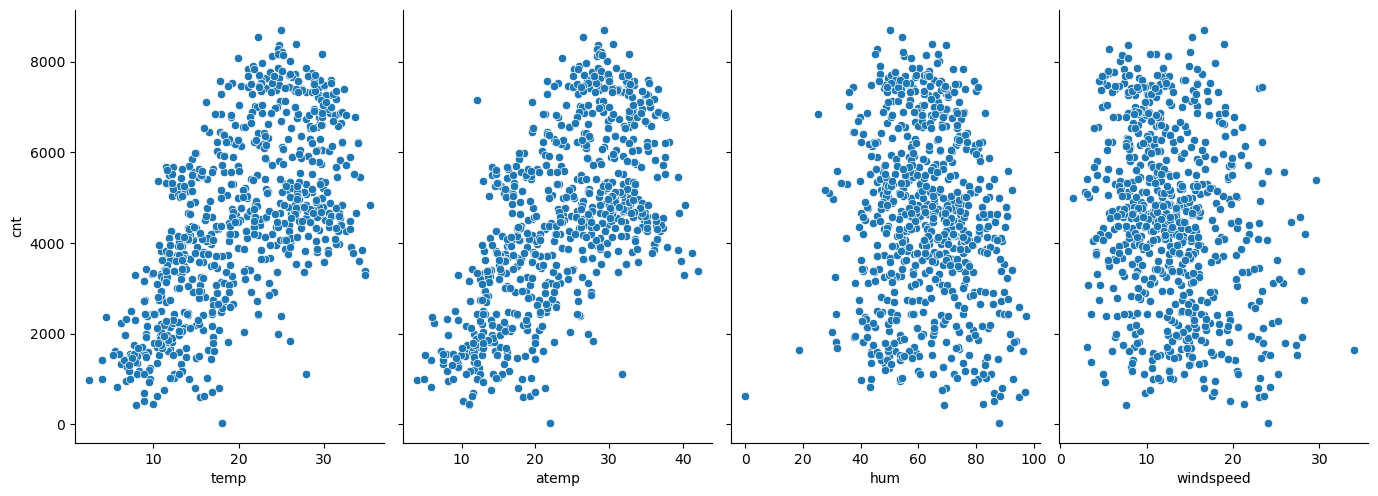

In [28]:
# Plot scatter plots for continuous variables against the target variable 'cnt'
sns.pairplot(df, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars='cnt', height=5, aspect=0.7)
plt.show()


## 4. Data Splitting and Feature Scaling


In [29]:
# Split the dataset into training (70%) and testing (30%) sets
train, test = train_test_split(df, test_size=0.3, random_state=42)

# Separate features and target variable
X_train = train.drop('cnt', axis=1)
y_train = train['cnt']
X_test = test.drop('cnt', axis=1)
y_test = test['cnt']

# Apply scaling to the training and test datasets
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## 5. Feature Selection and Model Building


### Recursive Feature Elimination (RFE):


In [30]:
# Initialize Linear Regression model
lm = LinearRegression()

# Apply RFE
rfe = RFE(lm, n_features_to_select=10)
rfe = rfe.fit(X_train_scaled, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['yr', 'atemp', 'hum', 'windspeed', 'season_spring', 'season_winter',
       'weathersit_light_rain', 'weathersit_mist', 'mnth_Jul', 'mnth_Nov'],
      dtype='object')


### Evaluate Features based on p-value and VIF:


In [31]:
# Build the model using selected features
X_train_rfe = X_train_scaled[:, rfe.support_]
X_test_rfe = X_test_scaled[:, rfe.support_]

X_train_rfe = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfe).fit()

# Display the summary of the regression model
print(lm_rfe.summary())

# Calculate VIF for the selected features
vif = pd.DataFrame()
vif['Features'] = selected_features
vif['VIF'] = [variance_inflation_factor(X_train_rfe, i+1) for i in range(X_train_rfe.shape[1]-1)]
print(vif)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.8
Date:                Fri, 31 May 2024   Prob (F-statistic):          7.12e-183
Time:                        21:31:29   Log-Likelihood:                -4145.4
No. Observations:                 511   AIC:                             8313.
Df Residuals:                     500   BIC:                             8359.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4552.9511     36.095    126.138      0.0

## 6. Residual Analysis

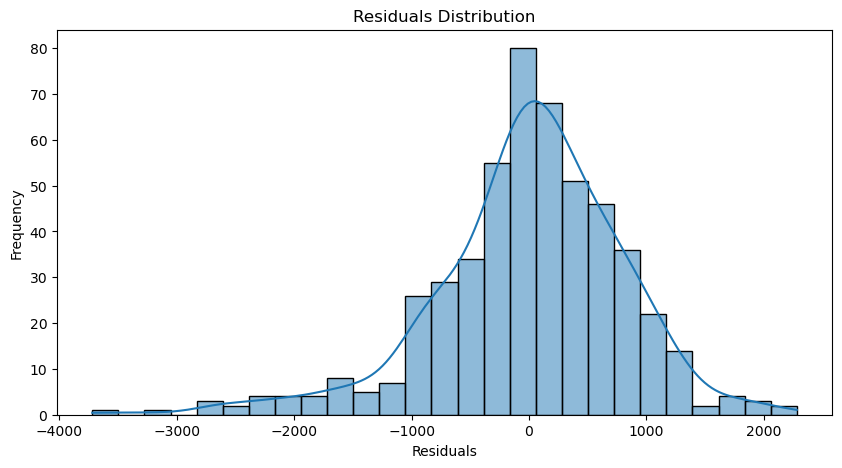

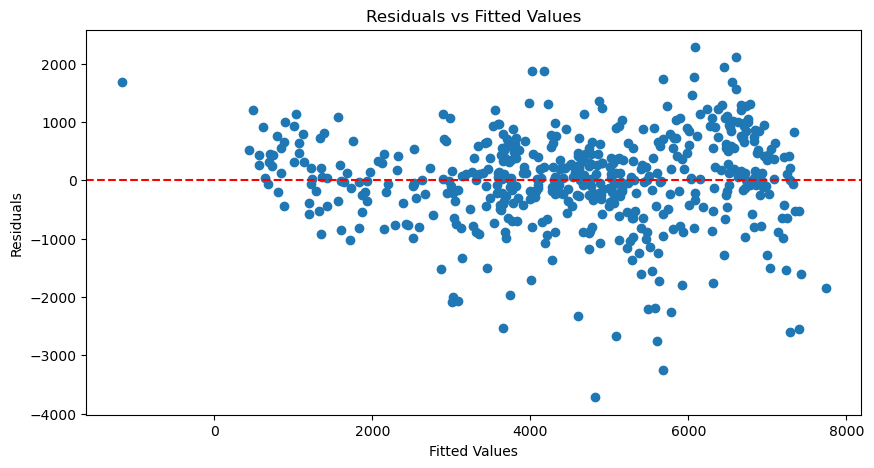

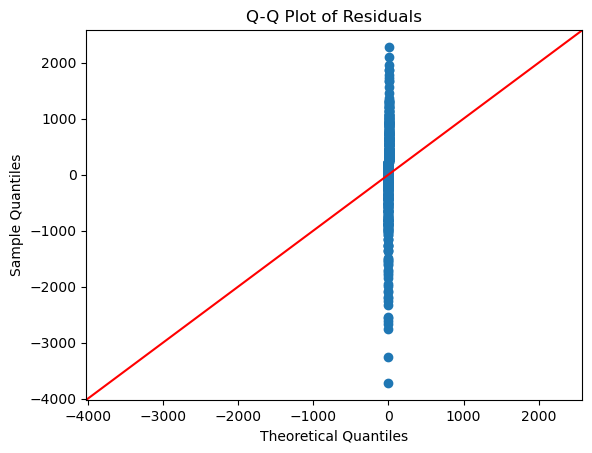

In [33]:
# Residual analysis
residuals = y_train - lm_rfe.predict(X_train_rfe)

# Plotting residuals to check for normality
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plotting residuals to check for homoscedasticity
plt.figure(figsize=(10, 5))
plt.scatter(lm_rfe.predict(X_train_rfe), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot to check for normality of residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.show()


## 7. Final Model Evaluation


In [32]:
# Build the final model with selected features
lm_final = LinearRegression()
lm_final.fit(X_train_rfe, y_train)

# Make predictions on the test set
X_test_rfe = sm.add_constant(X_test_rfe)
y_pred = lm_final.predict(X_test_rfe)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print("R-squared on test set:", r2)

# Calculate Adjusted R-squared
n = X_test_rfe.shape[0]
p = X_test_rfe.shape[1] - 1
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print("Adjusted R-squared on test set:", adj_r2)


R-squared on test set: 0.8222850851214837
Adjusted R-squared on test set: 0.8137410988292473
